In [1]:
!pip install pandas numpy matplotlib seaborn openpyxl scikit-learn

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Store data in a DataFrame

In [3]:
df = pd.read_excel(r"C:\Users\nimis\OneDrive\Desktop\NIMISHA\EDA\Data_Analysis_of_the_Effect_of_Digitalization_on_Economic_Growth.xlsx", engine='openpyxl')

# Exploring Data

In [4]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,id,Year,INCOME,...,BBS: Broadband Subscription,IU: Internet use,DDI,GFCF: Gross Fixed Capital Formation,TO: Trade Openness (expbs+Impbs),Labor (Hlabor+Flabor),LCPI: Consumers Price Index,LPOP: Poplulation,consum: Government Consuption,RD
0,High Income,Europe,1.0,Netherlands,Pays Bas,1,2000,1,2000,1,...,0.016325,0.439844,0.39172,0.225702,1.255219,1.27381,4.406078,16.583433,0.364773,0.017898
1,NaN,NaN,NaN,NaN,NaN,1,2001,1,2001,1,...,0.026325,0.449844,0.26795,0.235702,1.275219,1.28668,4.446796,16.590981,0.369977,0.017961
2,NaN,NaN,NaN,NaN,NaN,1,2002,1,2002,1,...,0.036325,0.459844,0.29133,0.245702,1.295219,1.30062,4.479143,16.597364,0.372896,0.017454
3,NaN,NaN,NaN,NaN,NaN,1,2003,1,2003,1,...,0.046325,0.469844,0.31063,0.255702,1.315219,1.29774,4.499847,16.602082,0.382046,0.017839
4,NaN,NaN,NaN,NaN,NaN,1,2004,1,2004,1,...,0.056325,0.479844,0.34787,0.265702,1.335219,1.30060,4.512404,16.605557,0.374042,0.017890


In [5]:
df.shape

(2730, 23)

# Missing Data Check

In [6]:
df.isna().sum()

Unnamed: 0                              2726
Unnamed: 1                              2607
Unnamed: 2                              2600
Unnamed: 3                              2600
Unnamed: 4                              2609
Unnamed: 5                                 0
Unnamed: 6                                 0
id                                         0
Year                                       0
INCOME                                     0
LGDP                                       0
FPS : Fixed Phone Subscriptions            0
MPS: Mobile Phone Subscriptions            0
BBS: Broadband Subscription                0
IU: Internet use                           0
DDI                                        0
GFCF: Gross Fixed Capital Formation        0
TO: Trade Openness  (expbs+Impbs)          0
Labor (Hlabor+Flabor)                      0
LCPI: Consumers Price Index                1
LPOP: Poplulation                          0
consum: Government Consuption              0
RD        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            4 non-null      object 
 1   Unnamed: 1                            123 non-null    object 
 2   Unnamed: 2                            130 non-null    float64
 3   Unnamed: 3                            130 non-null    object 
 4   Unnamed: 4                            121 non-null    object 
 5   Unnamed: 5                            2730 non-null   int64  
 6   Unnamed: 6                            2730 non-null   int64  
 7   id                                    2730 non-null   int64  
 8   Year                                  2730 non-null   int64  
 9   INCOME                                2730 non-null   int64  
 10  LGDP                                  2730 non-null   float64
 11  FPS : Fixed Phone

# Cleaning Data

In [8]:
#Dropping unnecessary columns
df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 2', 'Unnamed: 4', 'INCOME'], inplace=True)

In [9]:
#Renaming columns 
df.rename(columns={'Unnamed: 0': 'income_category', 'Unnamed: 1': 'continent','Unnamed: 3': 'country'}, inplace=True)

In [10]:
#Renaming columns for cleaner names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace(':', '').str.lower()

In [11]:
#Filling the missing values
df[['income_category', 'continent', 'country']] = df[['income_category', 'continent', 'country']].fillna(method='ffill')

In [12]:
# Filling the single missing value in the 'lcpi_consumers_price_index' column with the column's mean
df['lcpi_consumers_price_index'].fillna(df['lcpi_consumers_price_index'].mean(), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   income_category                     2730 non-null   object 
 1   continent                           2730 non-null   object 
 2   country                             2730 non-null   object 
 3   id                                  2730 non-null   int64  
 4   year                                2730 non-null   int64  
 5   lgdp                                2730 non-null   float64
 6   fps__fixed_phone_subscriptions      2730 non-null   float64
 7   mps_mobile_phone_subscriptions      2730 non-null   float64
 8   bbs_broadband_subscription          2730 non-null   float64
 9   iu_internet_use                     2730 non-null   float64
 10  ddi                                 2730 non-null   float64
 11  gfcf_gross_fixed_capital_formation  2730 no

# Summary Statistics

In [14]:
summary_stats = df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
id,2730.0,6.550000e+01,37.533532,1.000000,33.000000,65.500000,98.000000,130.000000
year,2730.0,2.010000e+03,6.056410,2000.000000,2005.000000,2010.000000,2015.000000,2020.000000
lgdp,2730.0,8.678145e+00,1.477015,5.555394,7.587988,8.606205,9.900314,11.629978
fps__fixed_phone_subscriptions,2730.0,2.096211e-01,0.191711,0.000000,0.042129,0.157477,0.334364,0.918004
mps_mobile_phone_subscriptions,2730.0,8.170670e-01,0.485352,0.000000,0.406741,0.873023,1.177644,2.916536
bbs_broadband_subscription,2730.0,1.077462e-01,0.135989,0.000000,0.002772,0.042837,0.192807,1.058074
iu_internet_use,2730.0,3.746524e-01,0.303873,0.000000,0.075431,0.326500,0.646969,1.000000
ddi,2730.0,-1.465201e-08,1.000000,-1.470730,-0.907650,-0.078745,0.842125,2.968360
gfcf_gross_fixed_capital_formation,2730.0,2.455086e-01,0.075200,0.015252,0.198568,0.234834,0.280631,0.601562
to_trade_openness__(expbs+impbs),2730.0,8.833844e-01,0.562682,0.195596,0.546072,0.755584,1.044083,4.426200


In [15]:
summary_stats['IQR'] = summary_stats['75%'] - summary_stats['25%']

print(summary_stats[['mean', '50%', 'std', 'IQR']])


                                            mean          50%        std  \
id                                  6.550000e+01    65.500000  37.533532   
year                                2.010000e+03  2010.000000   6.056410   
lgdp                                8.678145e+00     8.606205   1.477015   
fps__fixed_phone_subscriptions      2.096211e-01     0.157477   0.191711   
mps_mobile_phone_subscriptions      8.170670e-01     0.873023   0.485352   
bbs_broadband_subscription          1.077462e-01     0.042837   0.135989   
iu_internet_use                     3.746524e-01     0.326500   0.303873   
ddi                                -1.465201e-08    -0.078745   1.000000   
gfcf_gross_fixed_capital_formation  2.455086e-01     0.234834   0.075200   
to_trade_openness__(expbs+impbs)    8.833844e-01     0.755584   0.562682   
labor_(hlabor+flabor)               1.246620e+00     1.232915   0.205700   
lcpi_consumers_price_index          4.583226e+00     4.605170   0.375734   
lpop_poplula

# Distribution Analysis

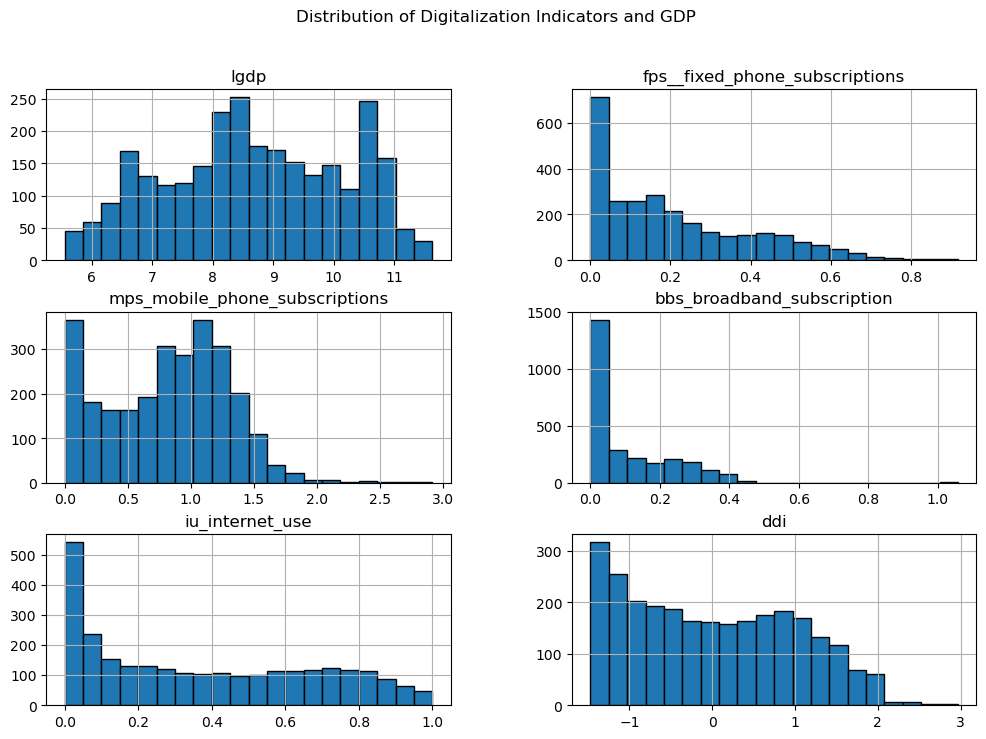

In [16]:
digitalization_vars = ['lgdp','fps__fixed_phone_subscriptions','mps_mobile_phone_subscriptions','bbs_broadband_subscription', 'iu_internet_use', 'ddi']

control_vars = ['gfcf_gross_fixed_capital_formation', 'to_trade_openness__(expbs+impbs)','labor_(hlabor+flabor)', 'lcpi_consumers_price_index', 'lpop_poplulation', 'consum_government_consuption', 'rd']

all_vars = digitalization_vars + control_vars

# Histograms for GDP and digitalization indicators
df[digitalization_vars].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Digitalization Indicators and GDP')
plt.show()

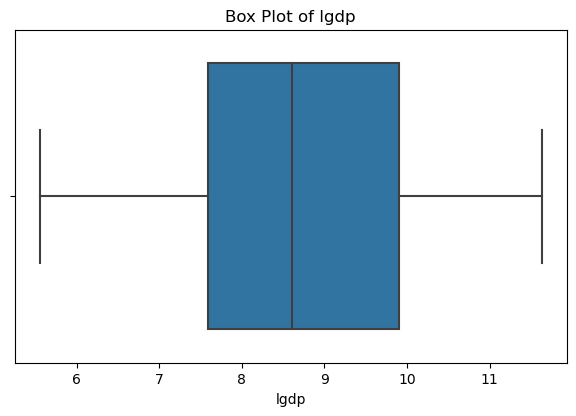

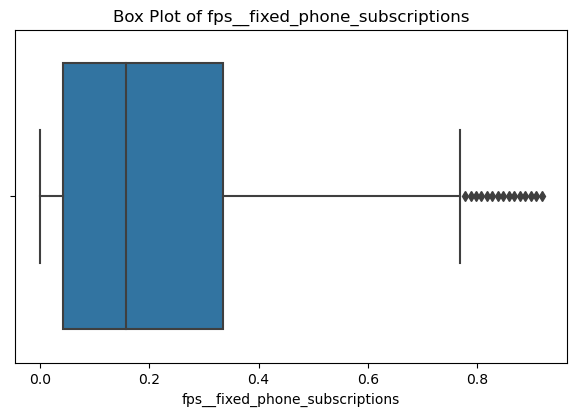

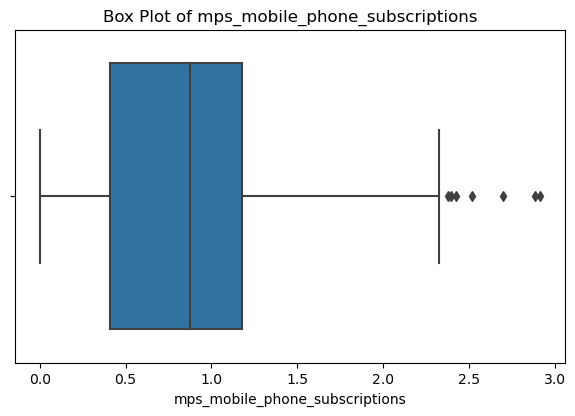

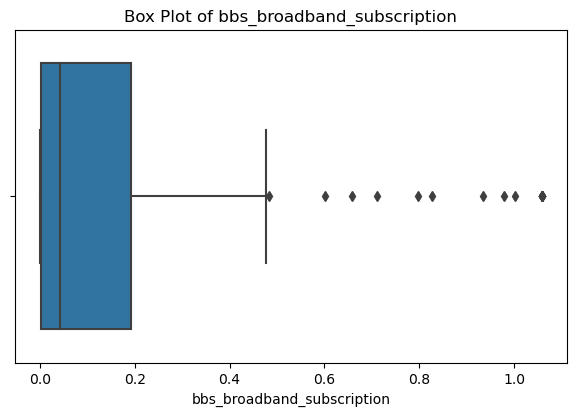

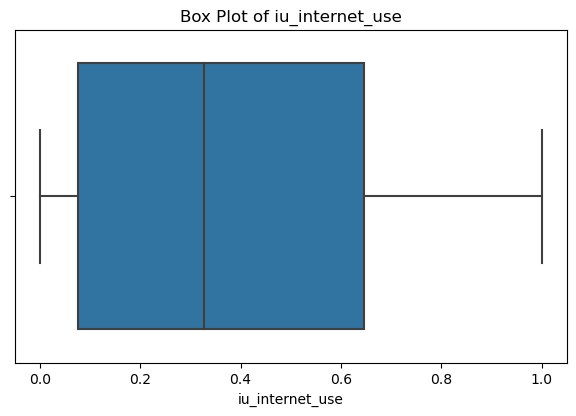

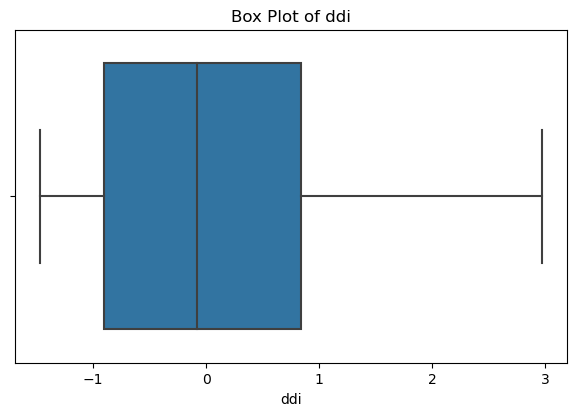

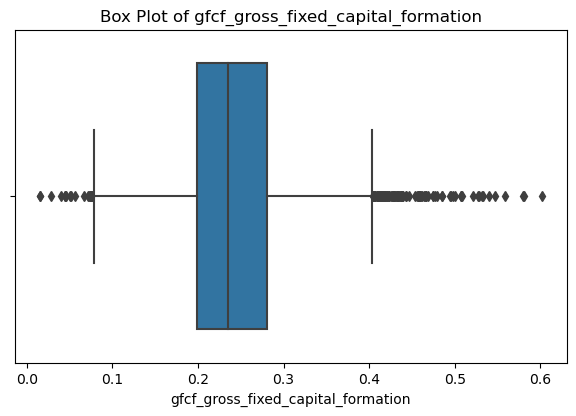

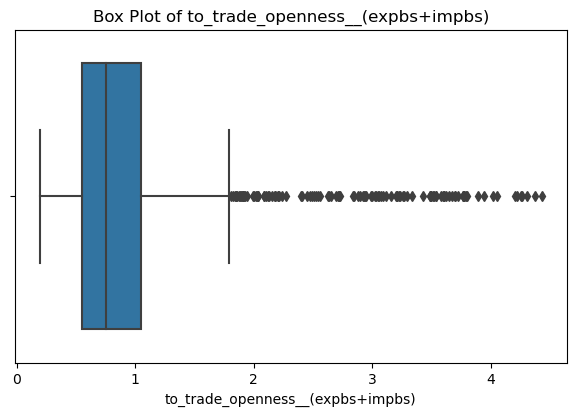

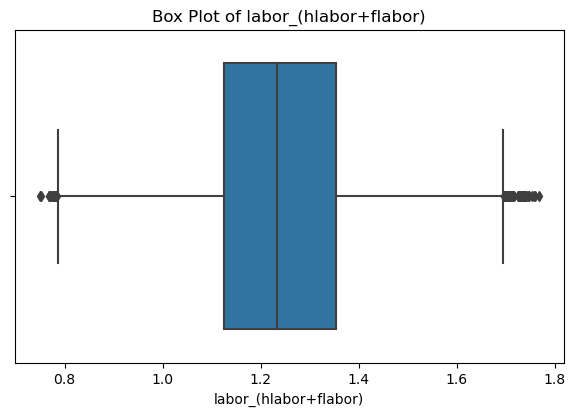

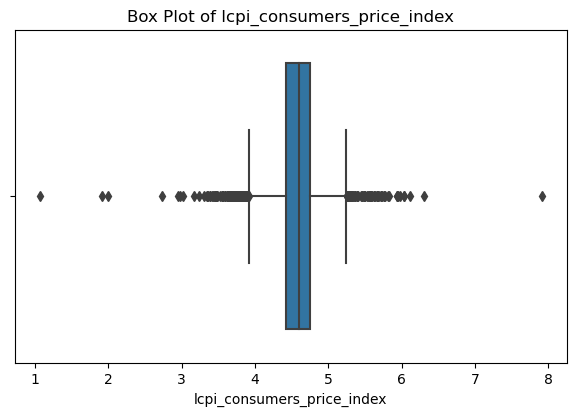

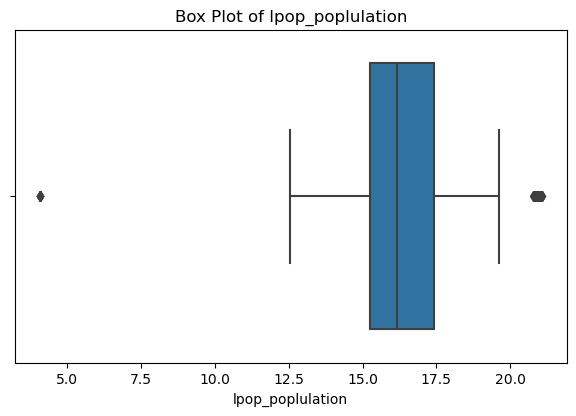

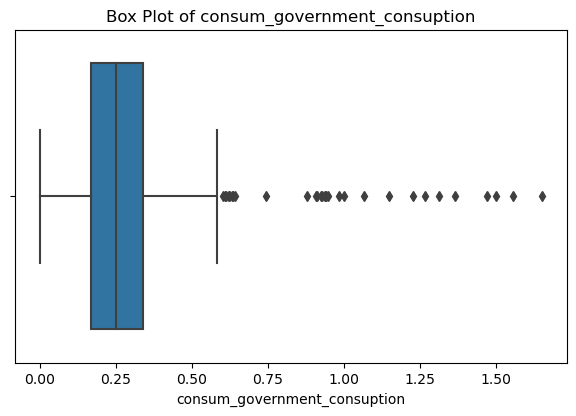

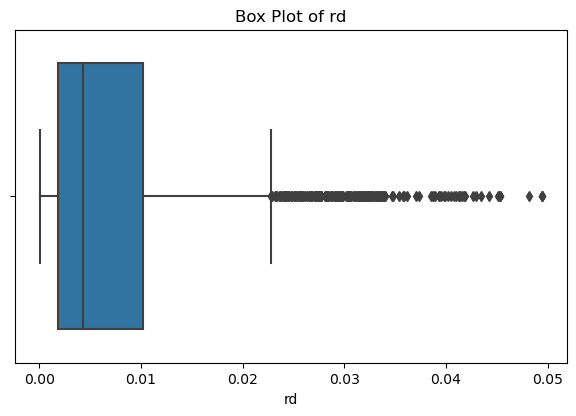

In [17]:
numeric_cols = [col for col in df.select_dtypes(include="number").columns if col not in ['id', 'year']]

# Boxplot for identifying outliers for each numeric column
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout(pad=3)
    plt.show()
    

# Correlation Matrix

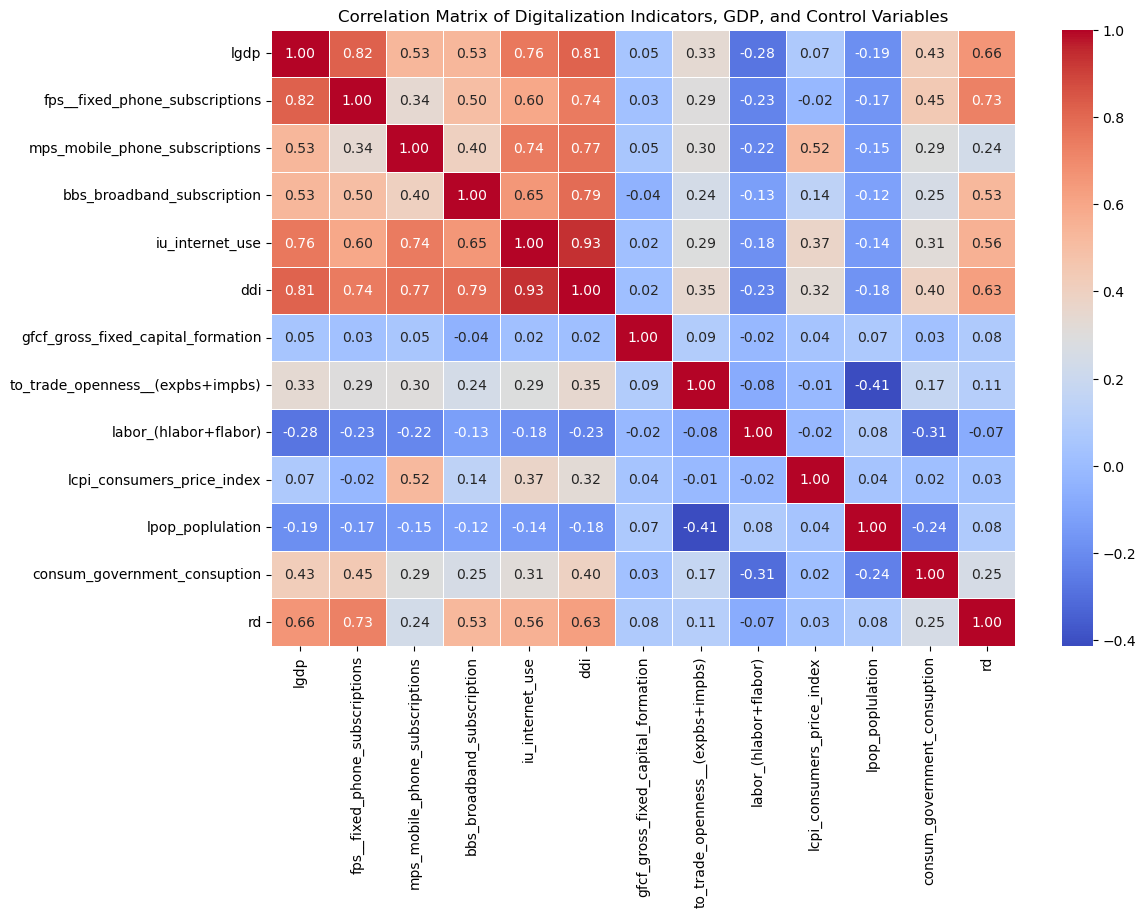

In [18]:
correlation_matrix = df[digitalization_vars + control_vars].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Digitalization Indicators, GDP, and Control Variables')
plt.show()

### Insights: 

- Variables like individuals using Internet, Fixed Broadband Subscription, and Fixed_phone subscriptions cluster strongly together, indicating they are closely interrelated.

- Negative or negligible correlations for labor-intensive sectors suggest that merely increasing labor input does not guarantee higher digital or economic output.

### Possible Interpretetions:

- Wealthier countries tend to have higher investments in digital infrastructure, as indicated by strong correlations with broadband subscriptions and internet usage.

- R&D investments (rd) are closely tied to economic strength (lgdp) and digitalization (iu_internet_use), emphasizing the role of innovation in economic development.


 # Regional Comparisons - Average Internet Use by Continent Over the Years

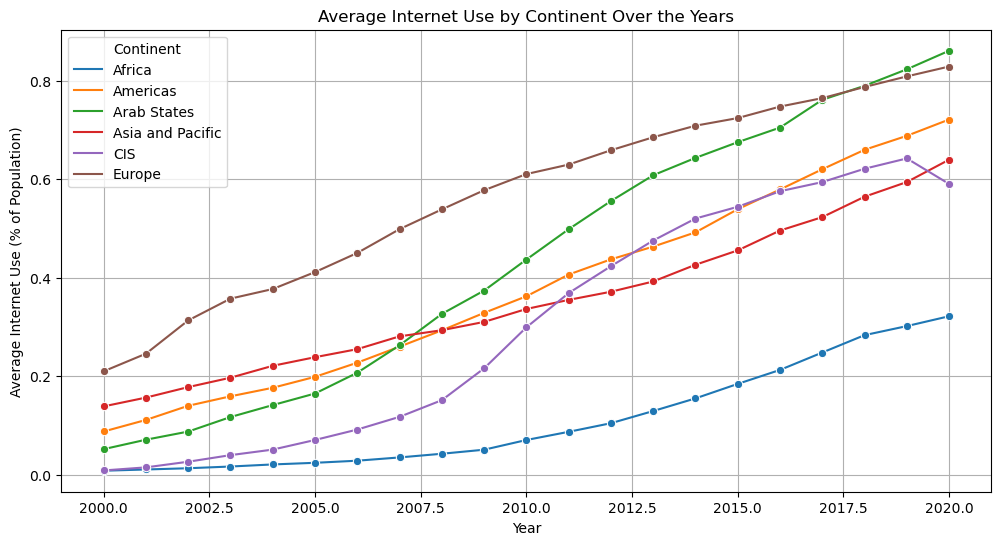

In [19]:
regional_comparison_by_year = df.groupby(["year", "continent"])["iu_internet_use"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_comparison_by_year, x="year", y="iu_internet_use", hue="continent", marker="o")
plt.title("Average Internet Use by Continent Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Internet Use (% of Population)")
plt.legend(title="Continent")
plt.grid()
plt.show()



### Insights:
- Europe consistently has the highest percentage of internet users, surpassing 80% by 2020. This suggests widespread infrastructure development, high income levels, and a focus on digital inclusion.

- Africa remains the region with the lowest internet penetration (below 40% by 2020). However, the steep upward curve indicates rapid growth. This could be due to mobile internet expansion, particularly in rural areas.

# Regional Comparisons - Investment and Trade Openness by continent

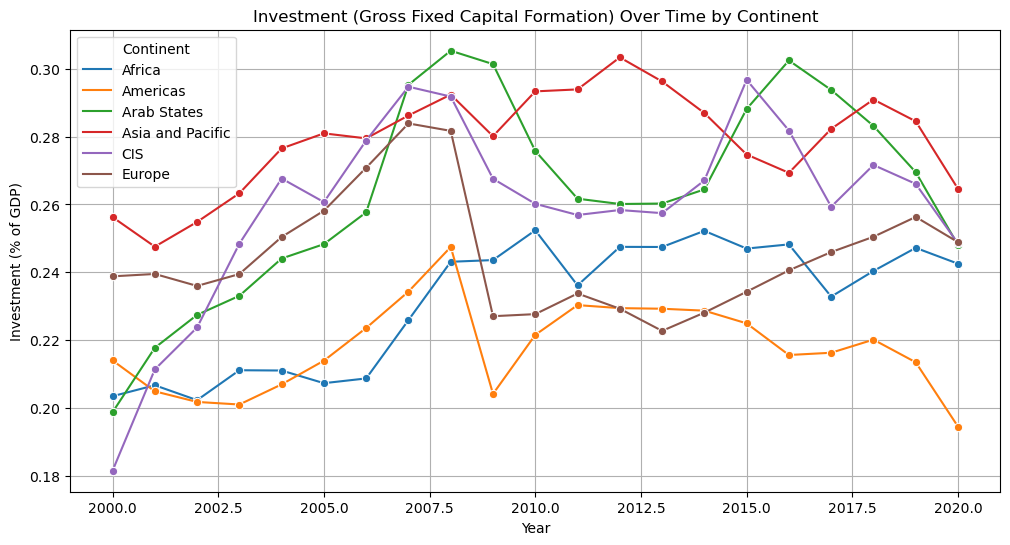

In [20]:
grouped_df = df.groupby(["year", "continent"])[["gfcf_gross_fixed_capital_formation", "to_trade_openness__(expbs+impbs)"]].mean().reset_index()

# Plot for Investment
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x="year", y="gfcf_gross_fixed_capital_formation", hue="continent", marker="o")
plt.title("Investment (Gross Fixed Capital Formation) Over Time by Continent")
plt.xlabel("Year")
plt.ylabel("Investment (% of GDP)")
plt.legend(title="Continent")
plt.grid()
plt.show()

### Insights:

- The Arab States show the highest levels of investment, particularly from 2007 to 2015. This could reflect infrastructure projects, driven by oil revenues and economic diversification efforts.
- Asia-Pacific experiences steady growth in investment, reaching a peak around 2015 before a slight decline. This may highlight the region's focus on industrialization and economic expansion.
- Europe and the CIS (Commonwealth of Independent States) follow a moderate investment trajectory, peaking around 2011 and then stabilizing.
- The Americas and Africa exhibit the lowest levels of investment throughout the period. Limited economic resources, political instability, or slower industrialization may explain these trends.

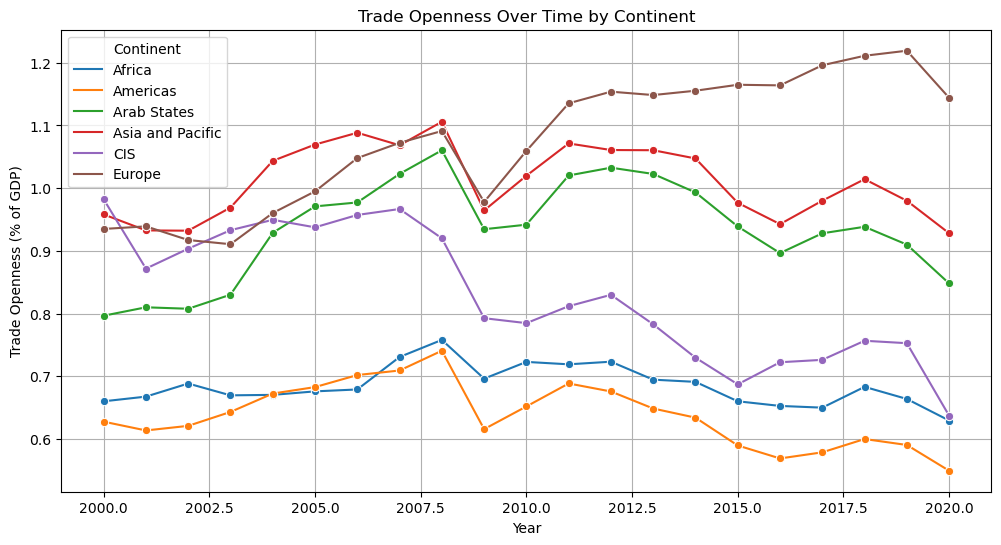

In [21]:
# Plot for Trade Openness
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x="year", y="to_trade_openness__(expbs+impbs)", hue="continent", marker="o")
plt.title("Trade Openness Over Time by Continent")
plt.xlabel("Year")
plt.ylabel("Trade Openness (% of GDP)")
plt.legend(title="Continent")
plt.grid()
plt.show()

### Insights:

- Europe consistently exhibits the highest trade openness, peaking around 2015–2017. This may reflect the strong trade relationships within the European Union and with external partners.
- Trade openness in the Arab States and Asia-Pacific steadily increased until around 2015, after which a decline is observed. This could be linked to global economic events such as declining oil prices and trade tensions.
- Africa and the Americas consistently show lower levels of trade openness, with minimal growth over the years. This may indicate less integration into global trade or reliance on internal markets.
- A general decline in trade openness is visible across all continents after 2015. This trend could be related to global trade challenges, including rising protectionism and economic slowdowns.

# Visualizing the Top 10 and Bottom 10 Countries by Digitalization and Control Variables

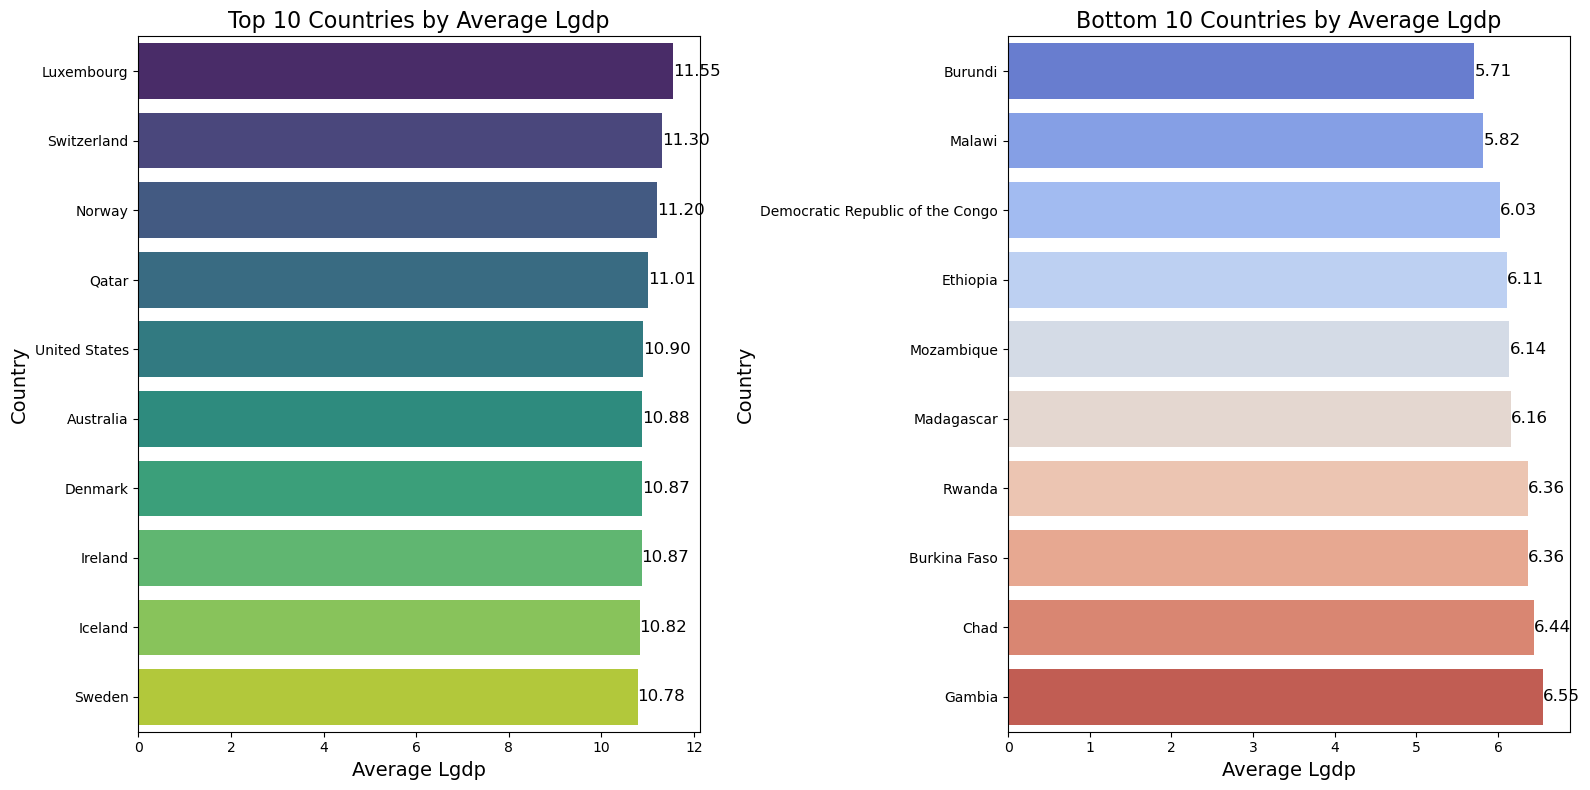

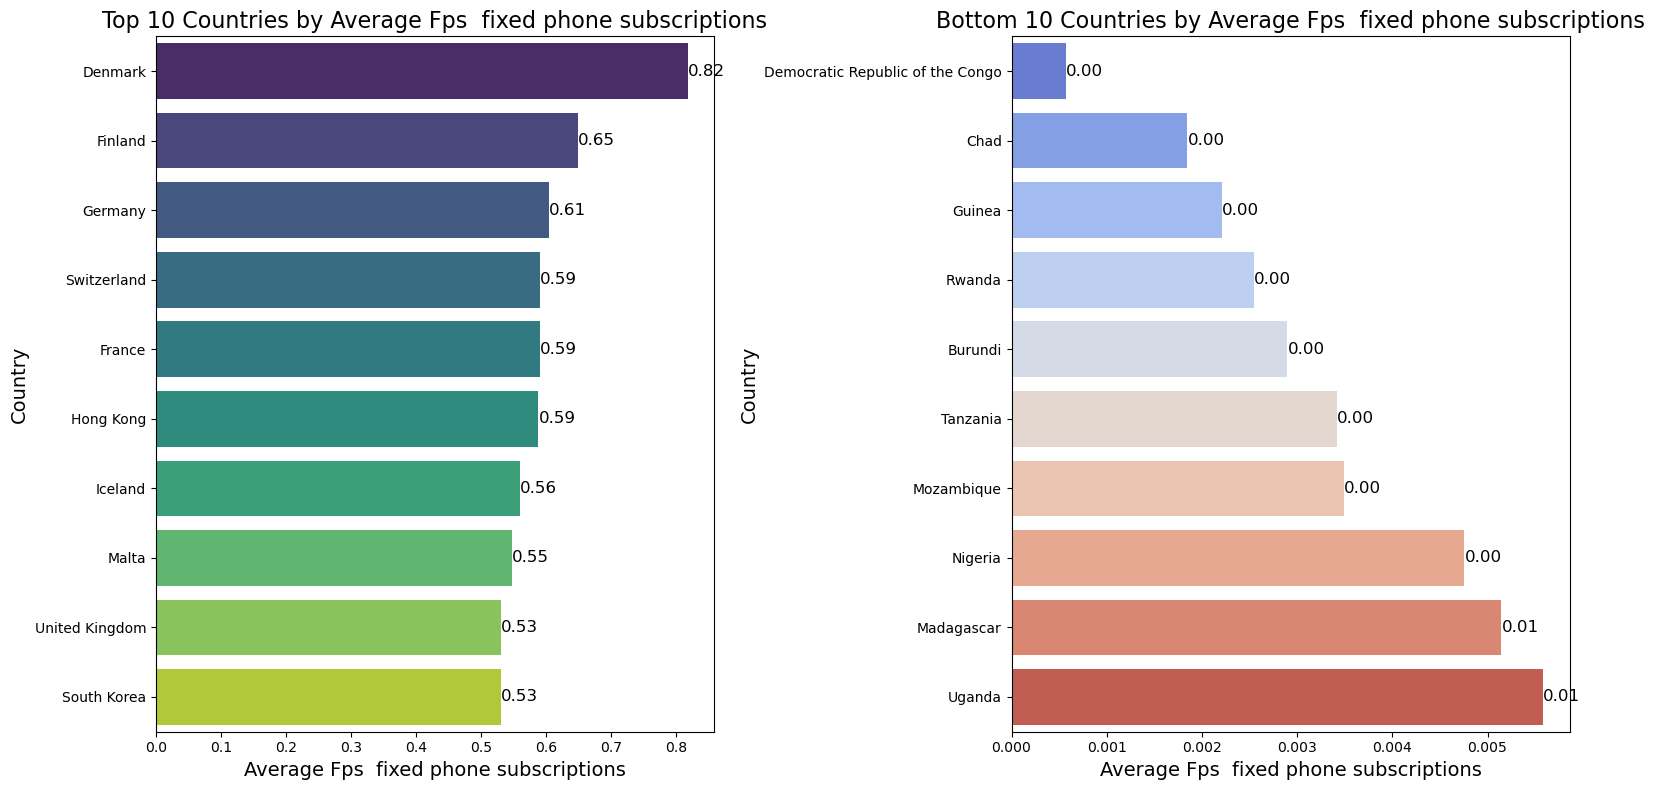

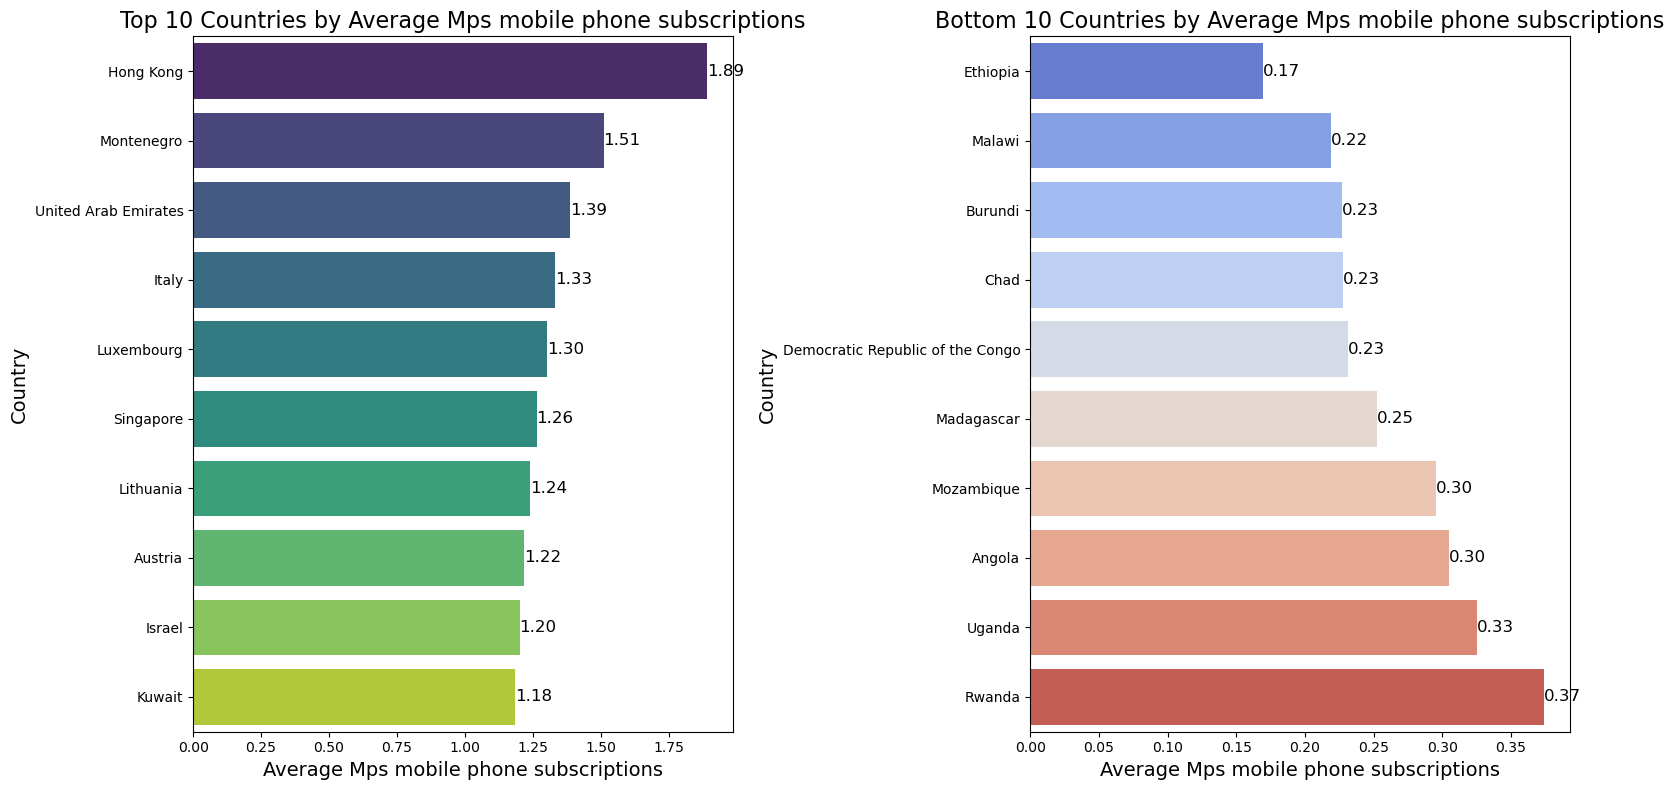

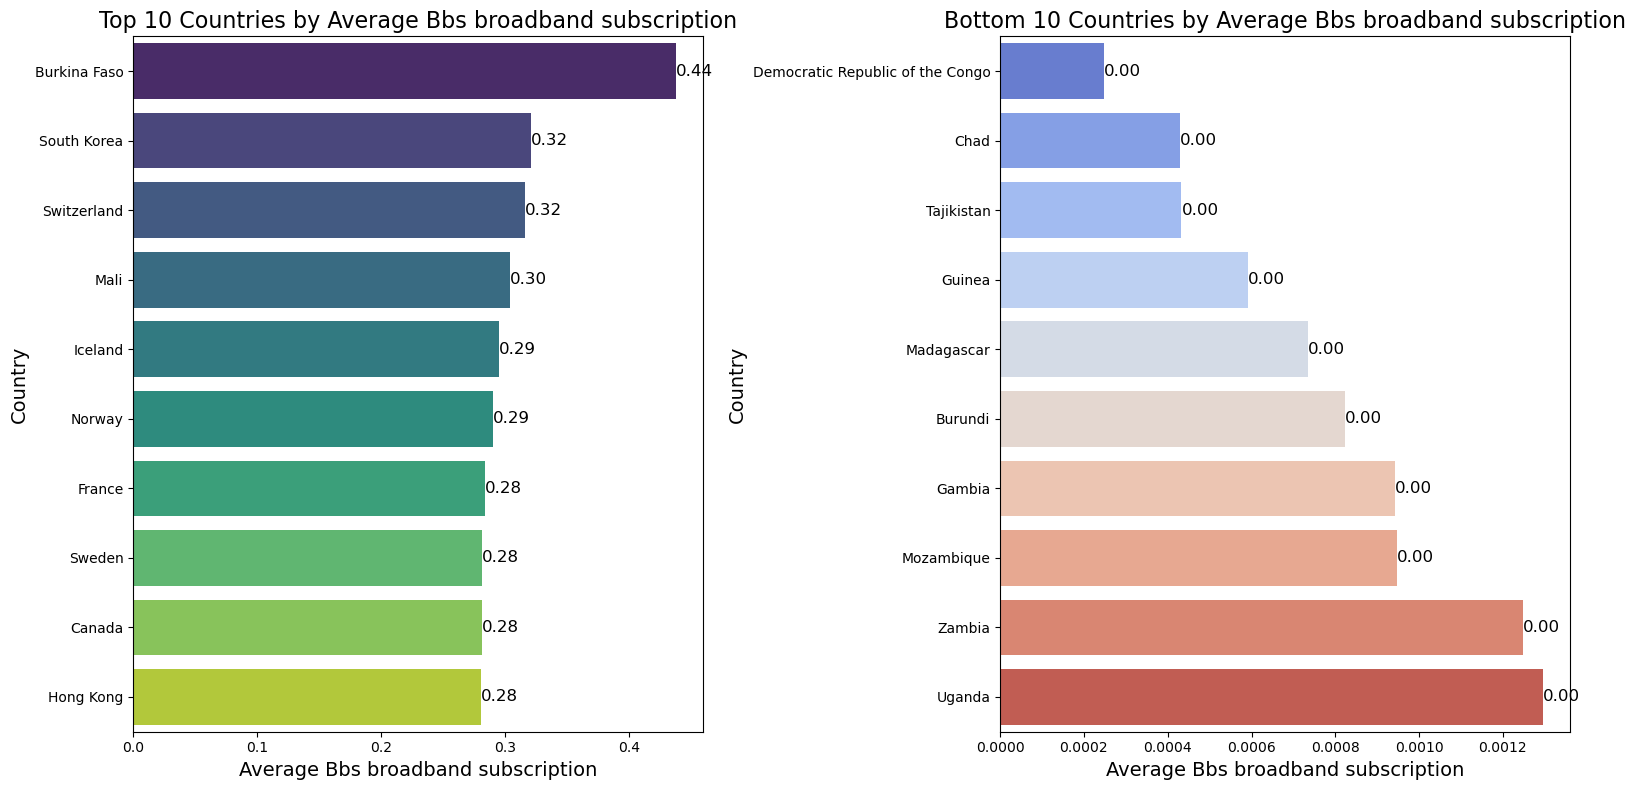

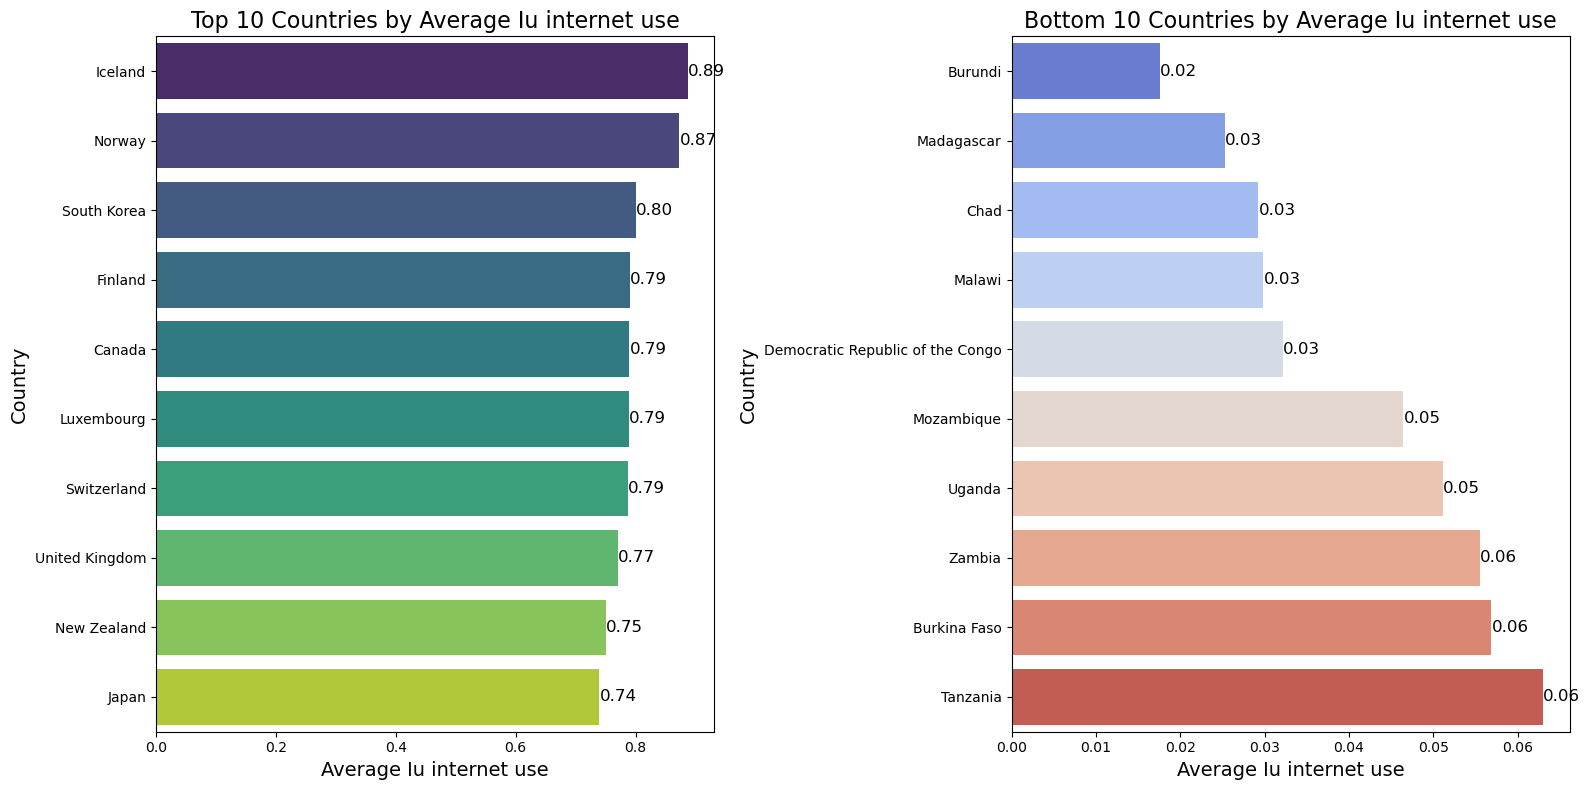

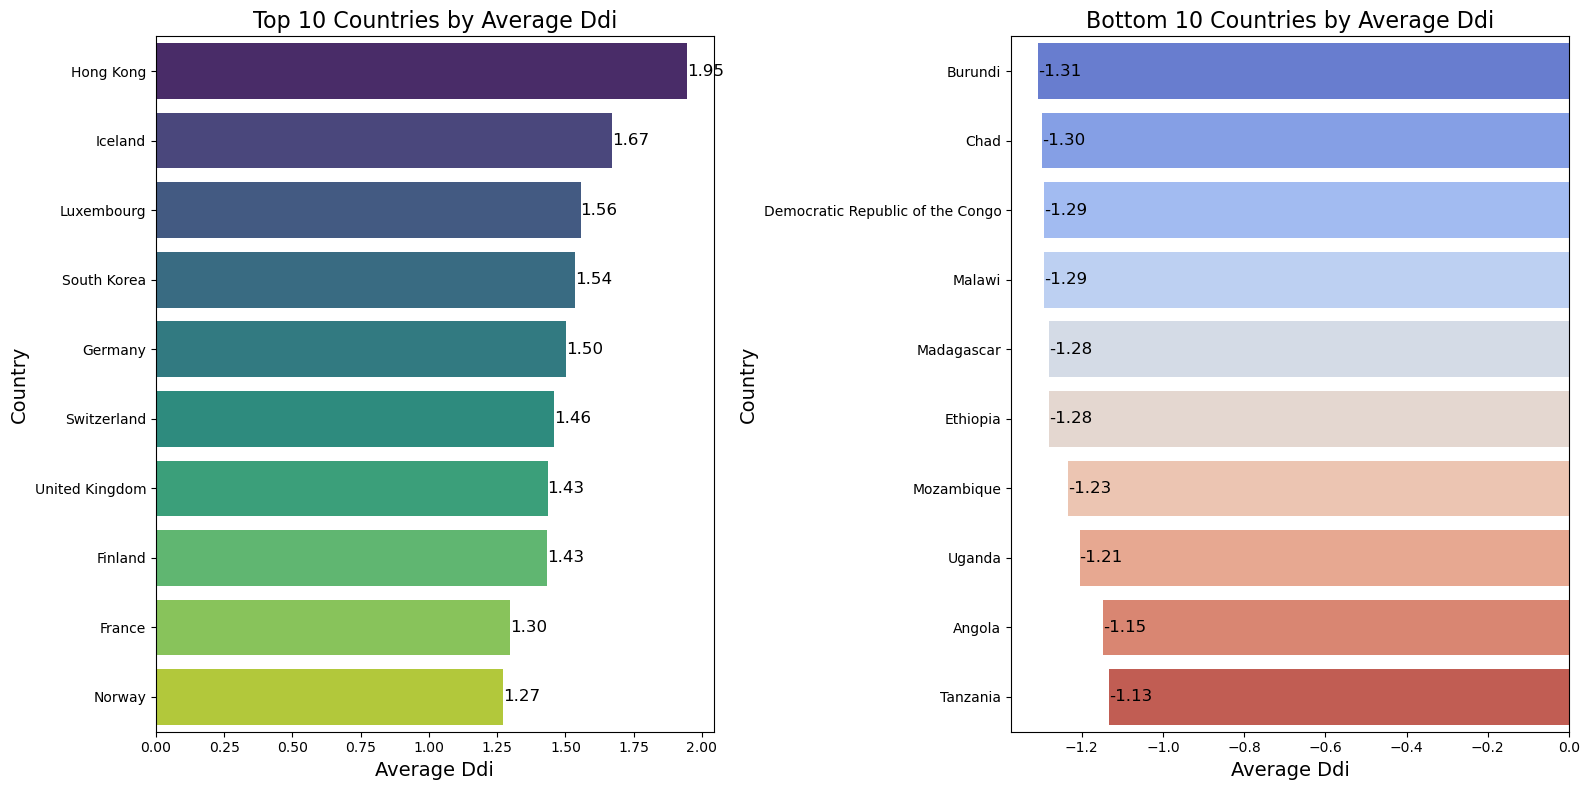

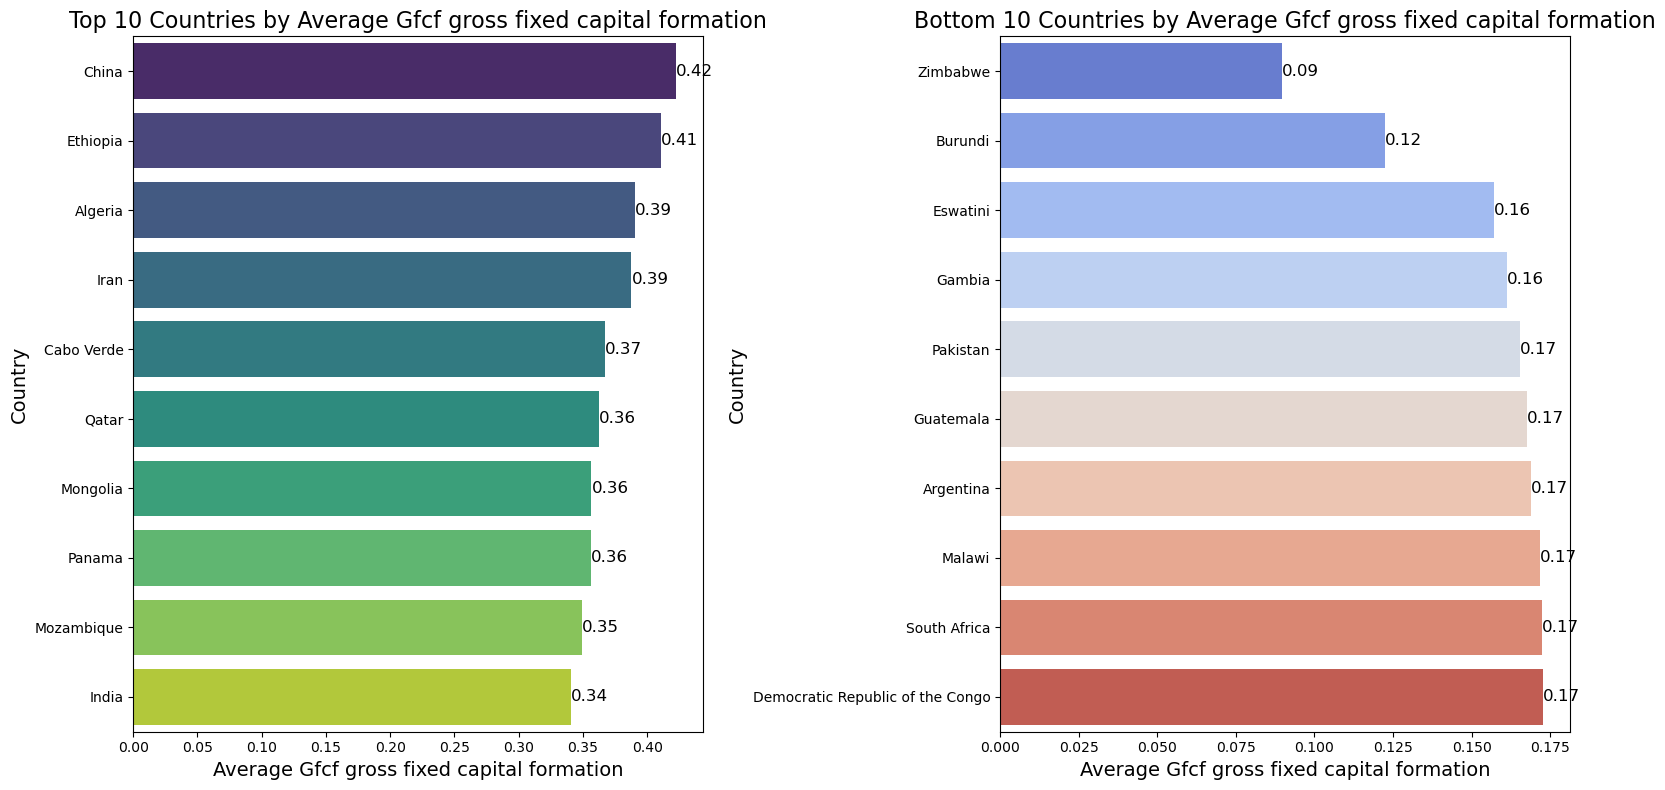

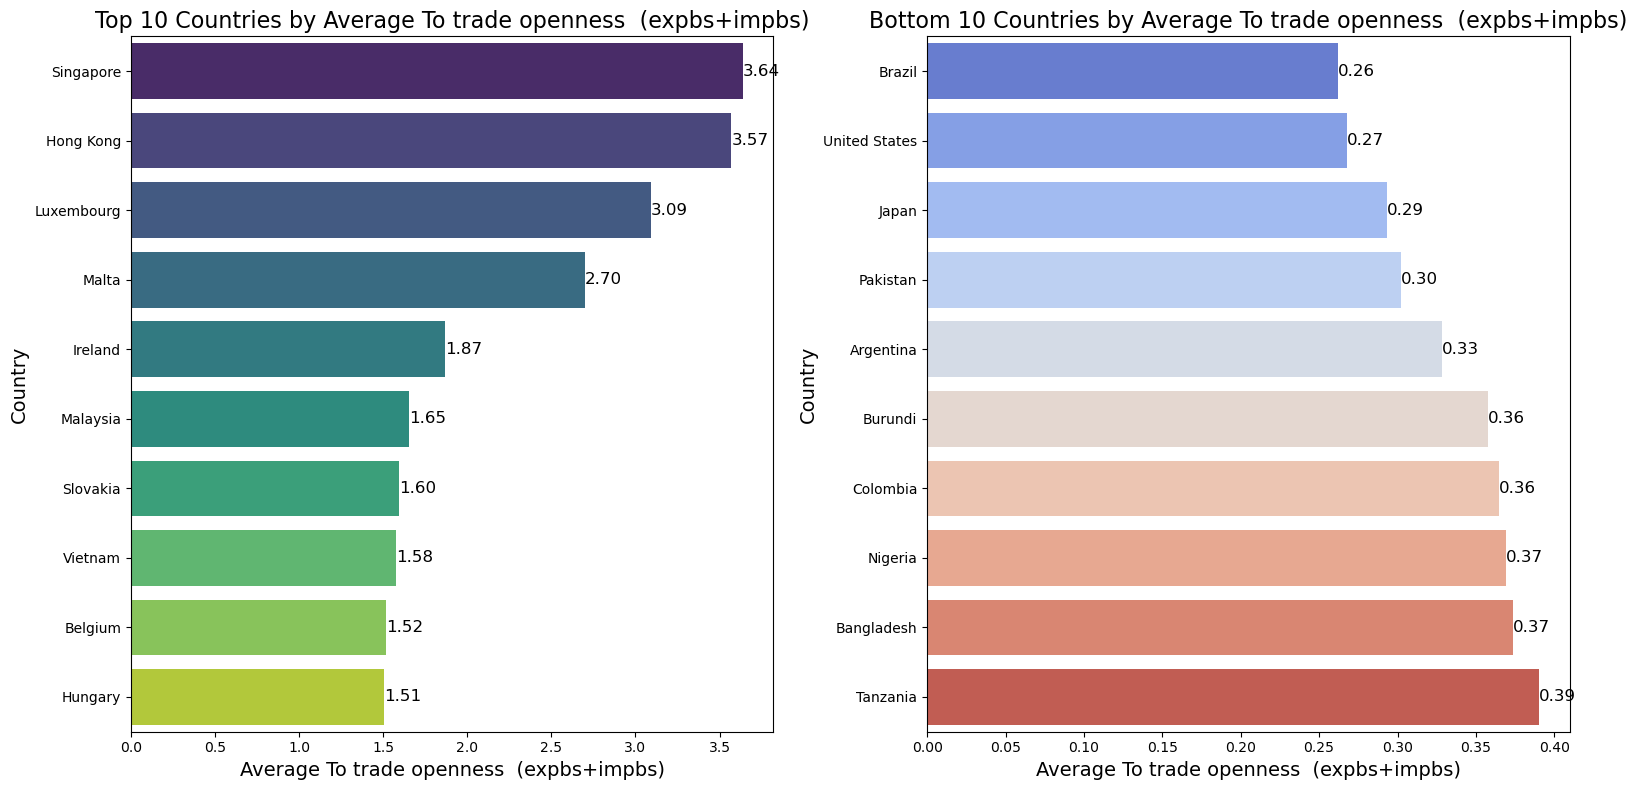

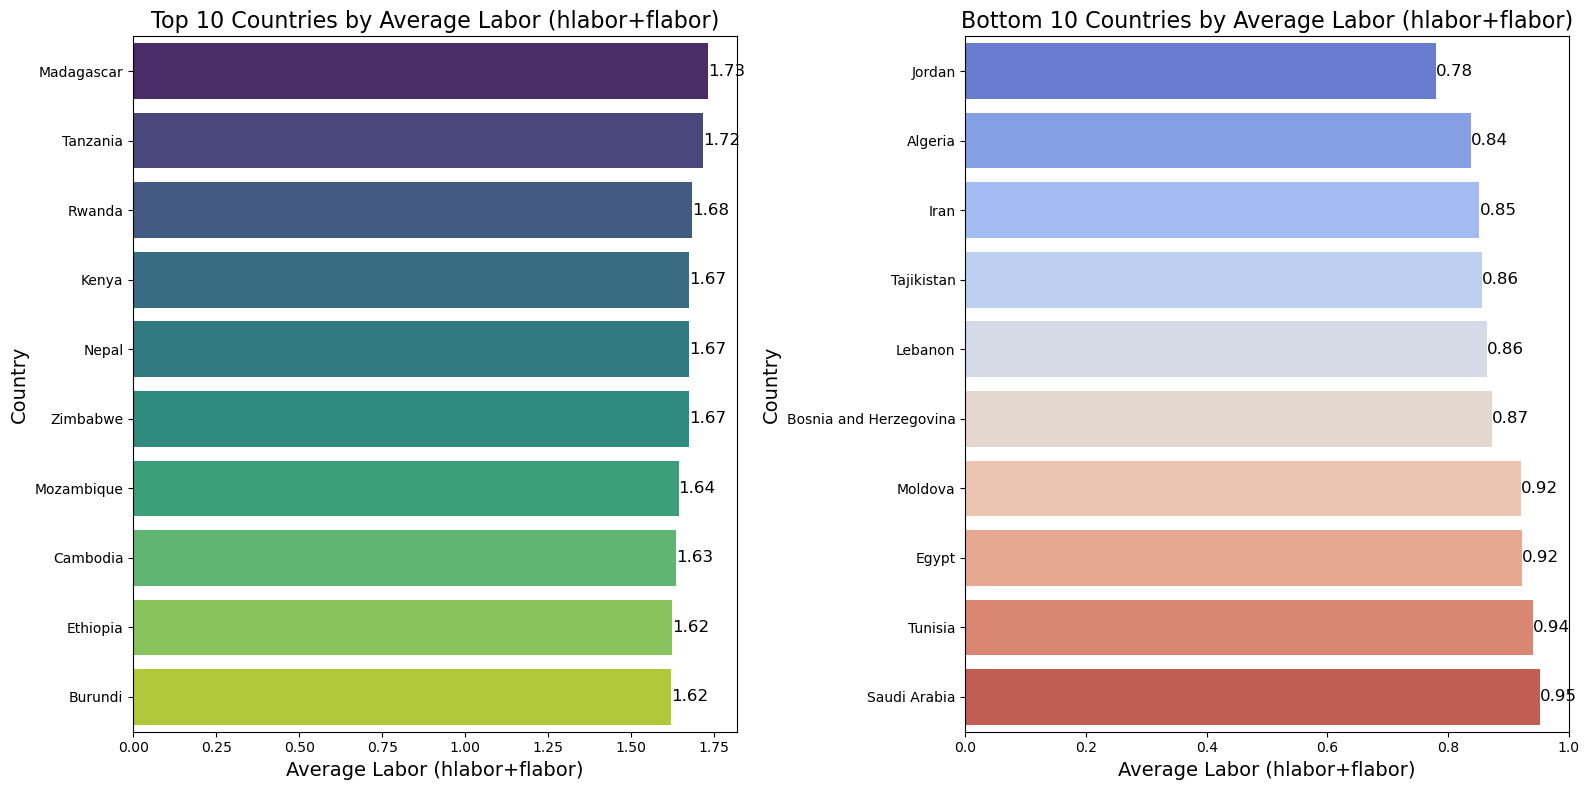

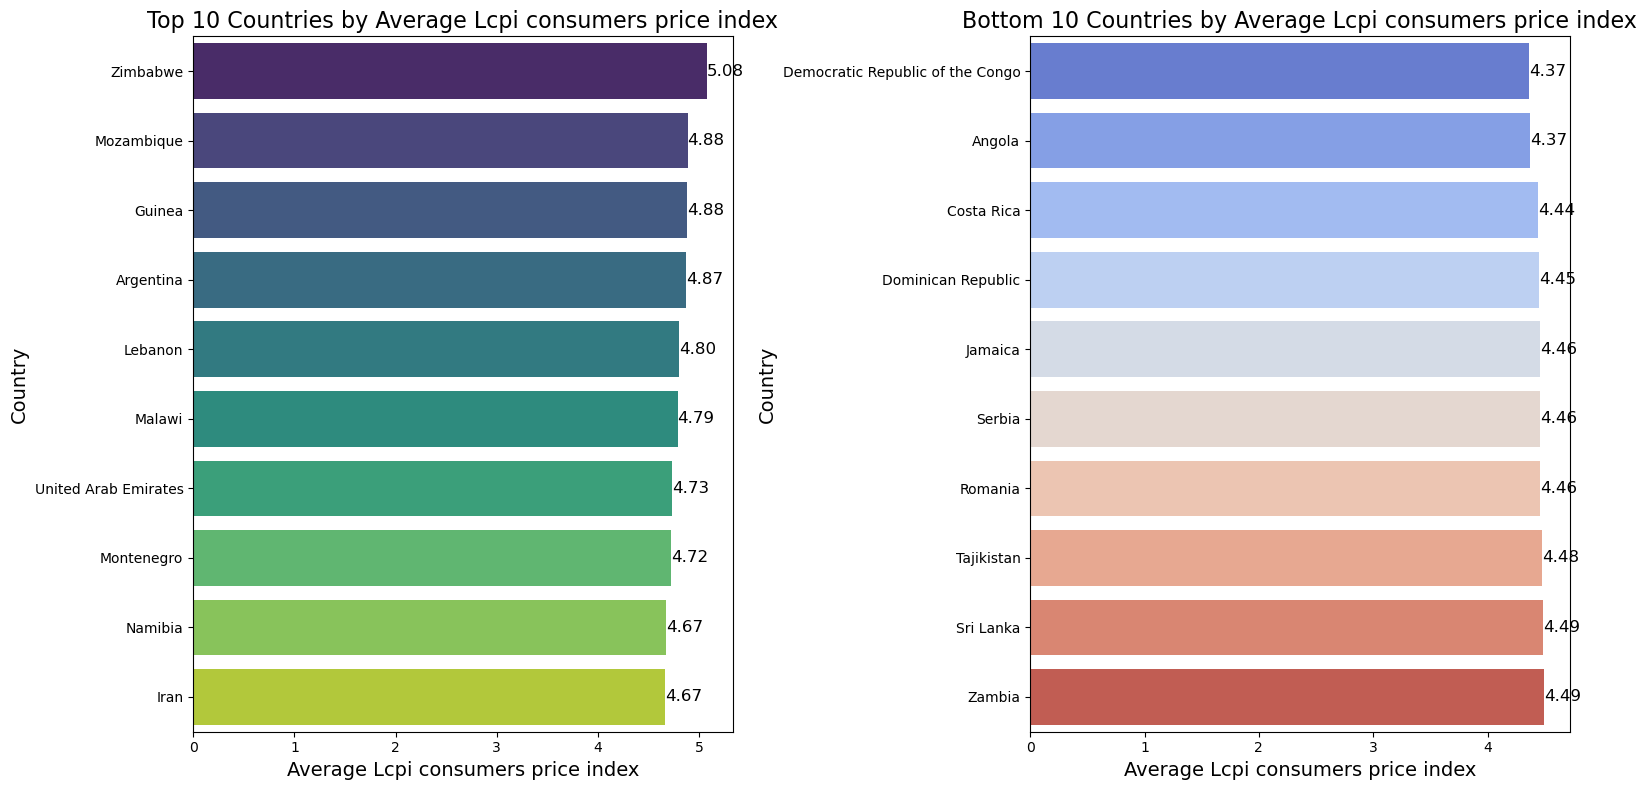

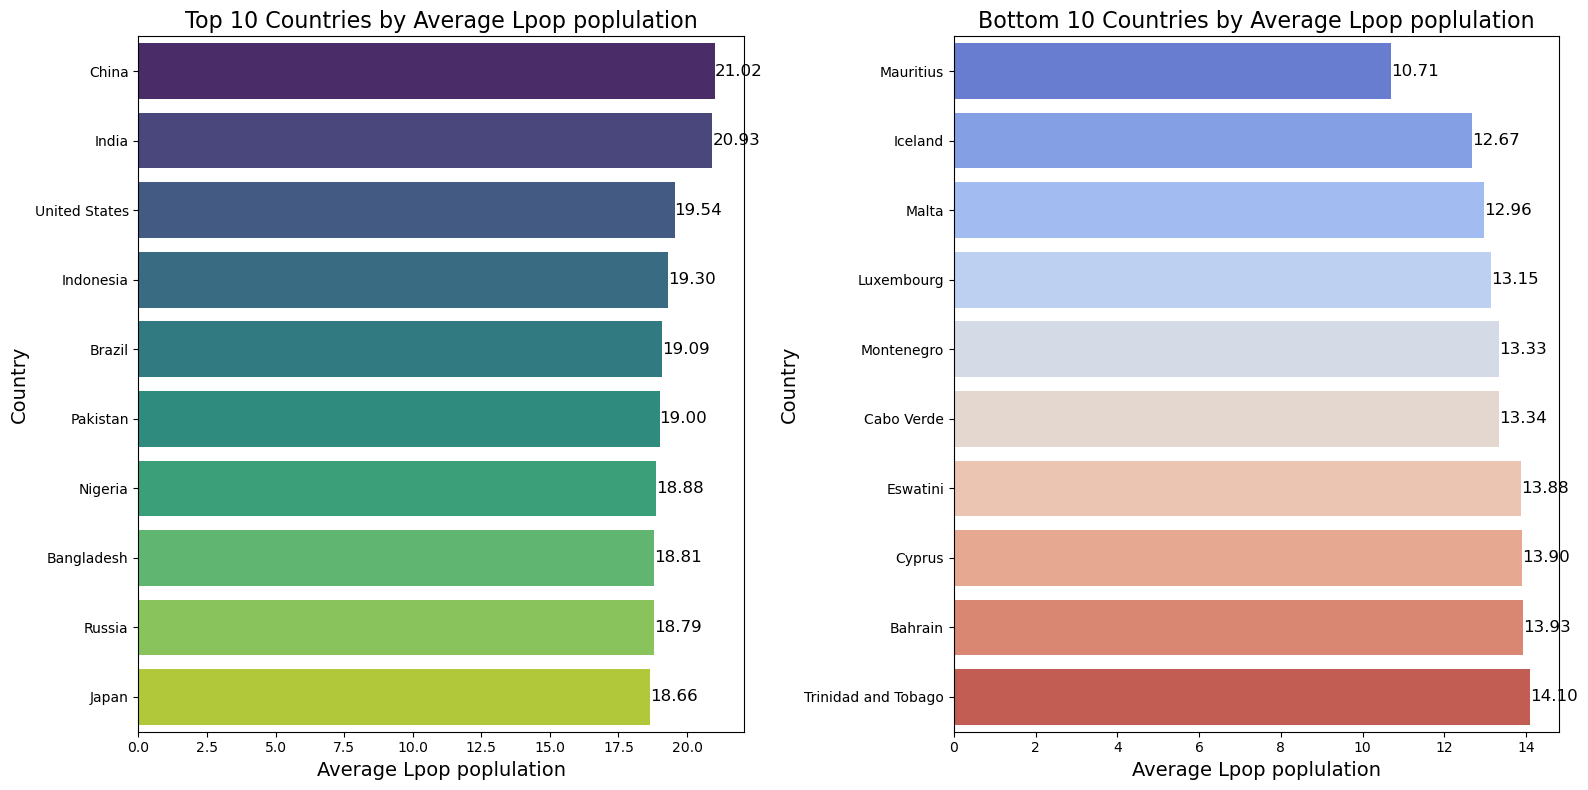

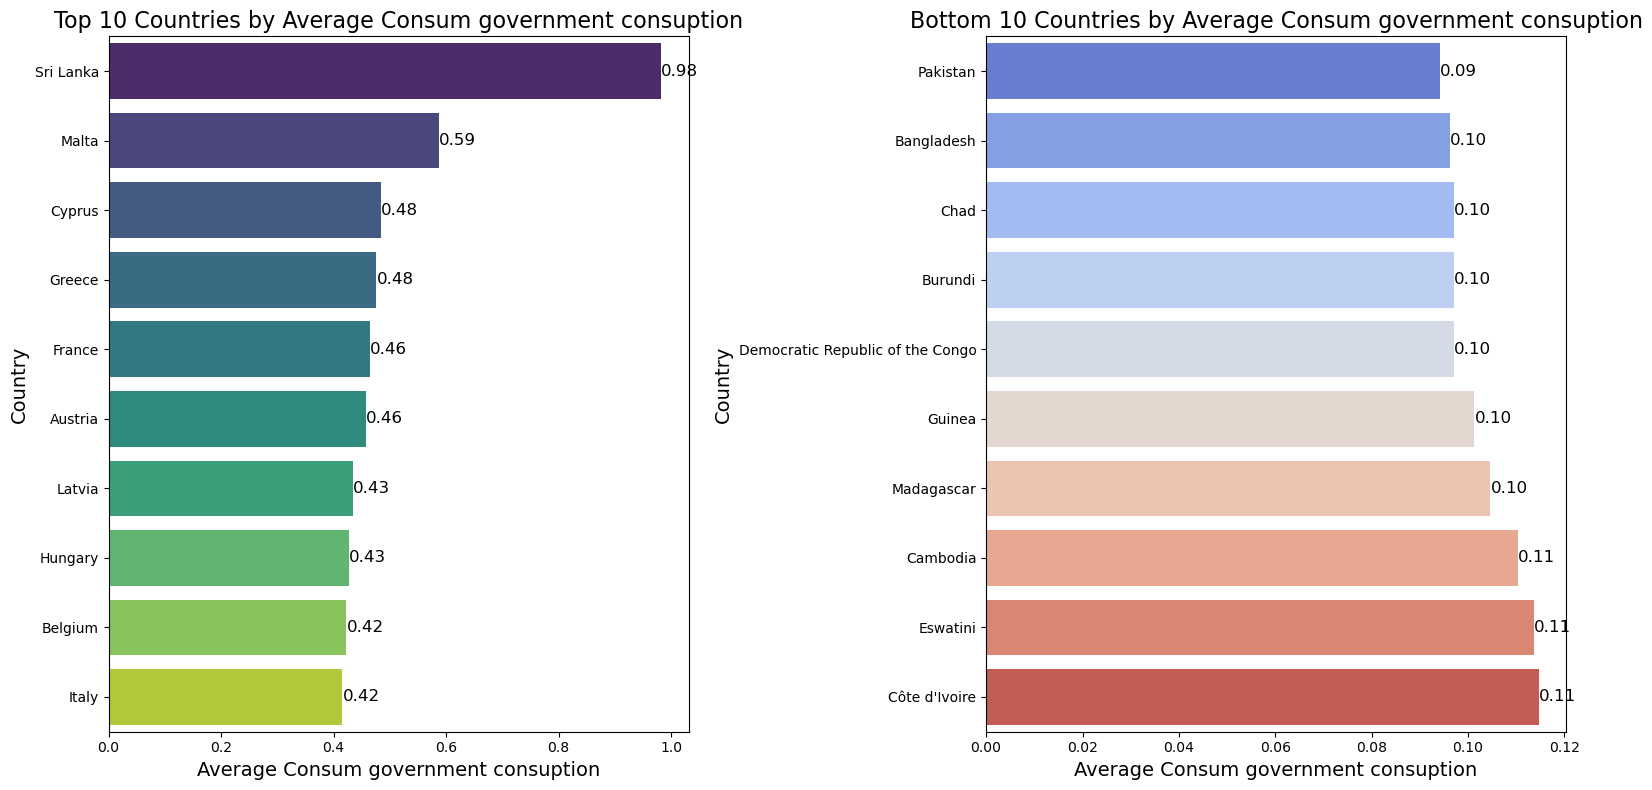

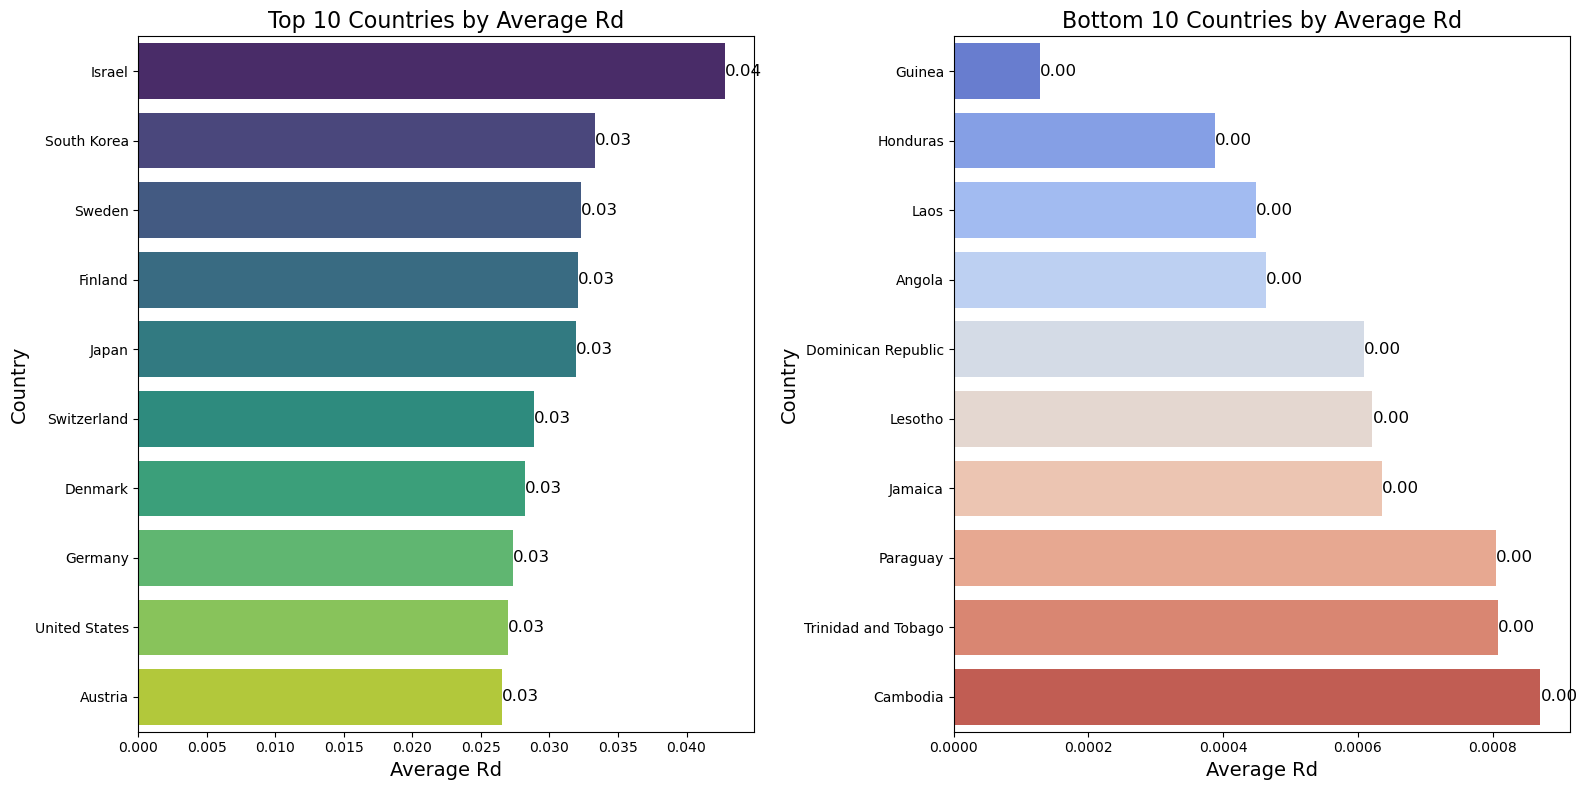

In [22]:
all_vars = digitalization_vars + control_vars


for var in all_vars:
    # Average of the current variable for each country
    country_avg = df.groupby('country')[var].mean().reset_index()

    top_10_countries = country_avg.sort_values(by=var, ascending=False).head(10)
    bottom_10_countries = country_avg.sort_values(by=var, ascending=True).head(10)

    # Figure and axes for two subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Plot for top 10 countries (on the left)
    sns.barplot(
        data=top_10_countries,
        x=var,
        y='country',
        palette='viridis',
        orient='h',
        ax=axes[0]
    )
    axes[0].set_title(f"Top 10 Countries by Average {var.replace('_', ' ').capitalize()}", fontsize=16)
    axes[0].set_xlabel(f"Average {var.replace('_', ' ').capitalize()}", fontsize=14)
    axes[0].set_ylabel("Country", fontsize=14)

    # Annotating the bars with values for top 10
    for index, value in enumerate(top_10_countries[var]):
        axes[0].text(value, index, f"{value:.2f}", va='center', ha='left', fontsize=12)

    # Plot for bottom 10 countries (on the right)
    sns.barplot(
        data=bottom_10_countries,
        x=var,
        y='country',
        palette='coolwarm',
        orient='h',
        ax=axes[1]
    )
    axes[1].set_title(f"Bottom 10 Countries by Average {var.replace('_', ' ').capitalize()}", fontsize=16)
    axes[1].set_xlabel(f"Average {var.replace('_', ' ').capitalize()}", fontsize=14)
    axes[1].set_ylabel("Country", fontsize=14)

    # Annotating the bars with values for bottom 10
    for index, value in enumerate(bottom_10_countries[var]):
        axes[1].text(value, index, f"{value:.2f}", va='center', ha='left', fontsize=12)

    plt.tight_layout()
    plt.show()


### Insights:

- Developed countries such as Luxembourg, Switzerland, and Iceland consistently lead in GDP, internet usage, broadband subscriptions, and digital development (DDI). These nations benefit from advanced infrastructure, robust economies, and high R&D investments, driving innovation and digital adoption.

- Developing countries like Burundi, Chad, and the Democratic Republic of the Congo face severe deficits across nearly all metrics.Limited broadband infrastructure, low fixed and mobile phone penetration, and restricted government spending hinder progress in digitalization and economic development. The digital divide, exacerbated by low internet usage and affordability barriers, remains a significant challenge.

- High trade openness in nations such as Singapore correlates with economic growth and global competitiveness. Conversely, countries with low trade openness e.g., Brazil and USA often rely on large domestic markets or protectionist policies.

- Nations like India and China leverage large labor pools and expanding markets, while smaller nations like Iceland focus on niche industries and innovation. Countries with high labor force participation (e.g., Cambodia, Ethiopia) are often driven by informal sectors, needing formal employment opportunities for economic stability.

- South Korea and Israel demonstrate how prioritizing R&D leads to technological advancements and digital leadership. Conversely, minimal R&D investment in nations like Guinea and Dominican Republic highlights the need for policy shifts to foster innovation.

- High CPI(consumer price index) levels in Zimbabwe indicate economic instability, while stable inflation in countries like Costa Rica fosters predictable economic environments.